# **Project Name - TED Talk Views Prediction**

![Image Alt Text](https://drive.google.com/uc?id=1EJ2MO3frxZJIgZr_ttJ-5UrZhayw-8Ba)

**Project Type**    - **Regression**
##### **Contribution**    - **Individual**
##### **Team Member 1 -** **Abhay Tevatia**    

# **Project Summary -**


TED stands for Technology, Entertainment and Design.

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together.

TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

Our main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website. As we have a continous variable to predict, we use regression models to predict the views of the TED talks.

# **GitHub Link -**

# **Problem Statement**


Our objective is to predict the views of a TED talk uploaded on the TEDx website. For this purpose; we have been provided with the following attributes which are to be used to predict the views on a particular video.

1-- Information about the Speakers

2-- Underlying topics of the video’s talk

3-- Type of Event in which the video was recorded

4-- Recorded and Published Date of the video

5-- Native language of the video and languages in which video is available

6-- Comments, Duration and web-address of the video
Related talks

7-- Description and Transcript of the video

**Features information:**

The dataset contains features like:


**talk_id**: Talk identification number provided by TED

**title**: Title of the talk

**speaker_1**: First speaker in TED's speaker list

**all_speakers**: Speakers in the talk

**occupations**: Occupations of the speakers

**about_speakers**: Blurb about each speaker

**recorded_date**: Date the talk was recorded

**published_date**: Date the talk was published to TED.com

**event**: Event or medium in which the talk was given

**native_lang**: Language the talk was given in

**available_lang:** All available languages (lang_code) for a talk

**comments:** Count of comments

**duration:** Duration in seconds

**topics:** Related tags or topics for the talk

**related_talks:** Related talks (key='talk_id',value='title')

**url:** URL of the talk

**description:** Description of the talk

**transcript**: Full transcript of the talk

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [ ]:
# Load Dataset
# mount drive
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
#loading the dataset and creating a dataframe
df=pd.read_csv('/content/data_ted_talks.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(4005, 19)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0



* There are only 3 numerical columns in the dataset out of which 1 is target variable and 2 can be used as features and rest all columns are categorical columns.
* main goal here is to find or generate some numerical columns from these columns.



#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
talk_id             0
description         0
url                 0
related_talks       0
topics              0
duration            0
event               0
available_lang      0
native_lang         0
title               0
published_date      0
views               0
speaker_1           0
transcript          0
dtype: int64

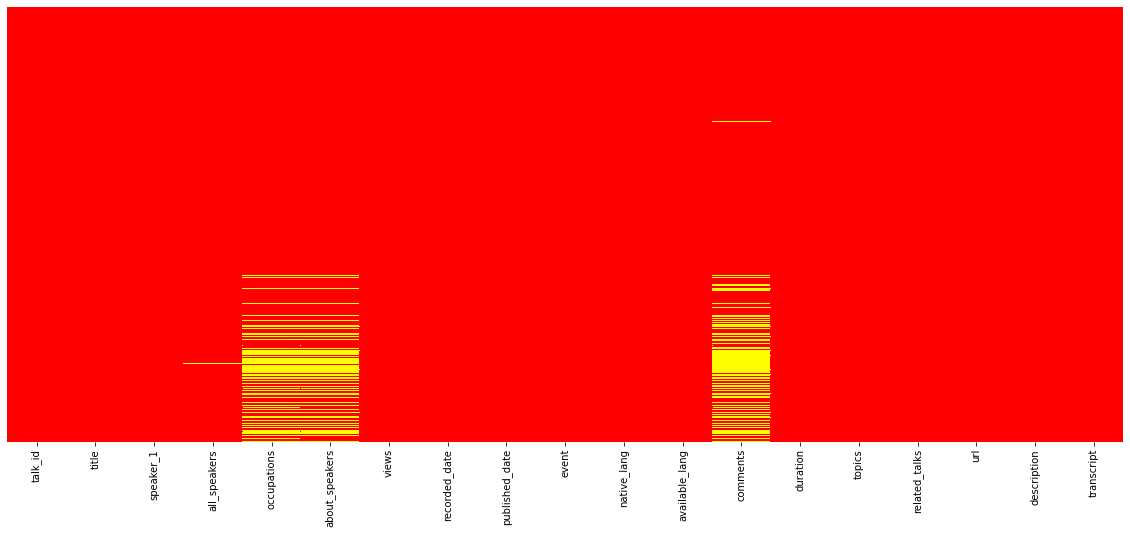

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='autumn')
plt.rcParams['figure.figsize'] = (20, 8)

### What did you know about your dataset?

The dataset contains NaN values in few columns like:



*   all_speakers
*   occupations
*   about_speakers
*   comments
*   recorded_date









## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
variables_df = df.columns.to_list()

In [ ]:
for i in variables_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of talk_id are: [    1    92     7 ... 62263 62784 62794]
The Unique Values of title are: ['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean']
The Unique Values of speaker_1 are: ['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright']
The Unique Values of all_speakers are: ["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpenter II'}" "{0: 'Daina Ramey Berry'}"
 "{0: 'Cella Wright'}"]
The Unique Values of occupations are: ["{0: ['climate advocate']}"
 "{0: ['global health expert; data visionary']}"
 "{0: ['technology columnist']}" ...
 "{0: ['psychotherapist', 'psychosomatic psychiatrist']}"
 "{0: ['epidemiologist', 'philanthropist'], 1: ['head of ted']}"
 "{0: ['law researcher']}"]
The Unique Values of about_speake

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Dropping Url column
df = df.drop(columns=['url'])

In [ ]:
#Replacing Null Values
df['occupations'].fillna('Not Present',inplace = True)
df['all_speakers'].fillna('No Speaker',inplace = True)
df['about_speakers'].fillna('Not Present',inplace = True)
df['comments'].fillna('No Comments',inplace = True)
df['recorded_date'].fillna('Not Present',inplace = True)

### What all manipulations have you done and insights you found?

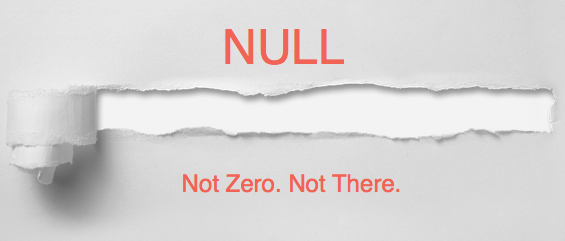

 **Dropped the Url columns,as it had no use.
Cleaned the data and replaced the null values.So there no more null values.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart - 1

**Who are the speakers of top 5 most watched TED talks?**

In [ ]:
popular_df = df.nlargest(5, ['views'])
popular_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


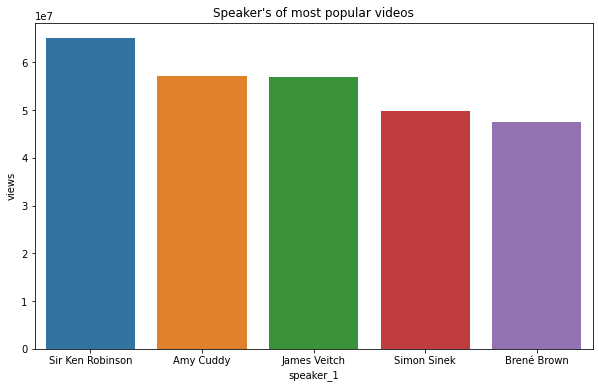

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular videos")
sns.barplot(x='speaker_1', y='views', data=popular_df)

##### 1. Why did you pick the specific chart?

Because i wanted to check the speakers of top 5 most watched TED talks.

##### 2. What is/are the insight(s) found from the chart?

1--Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk with more than 65 million views.

2--There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.


#### Chart - 2

Who is the most popular speaker?

In [ ]:
popular_speaker_df = df.groupby('speaker_1').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


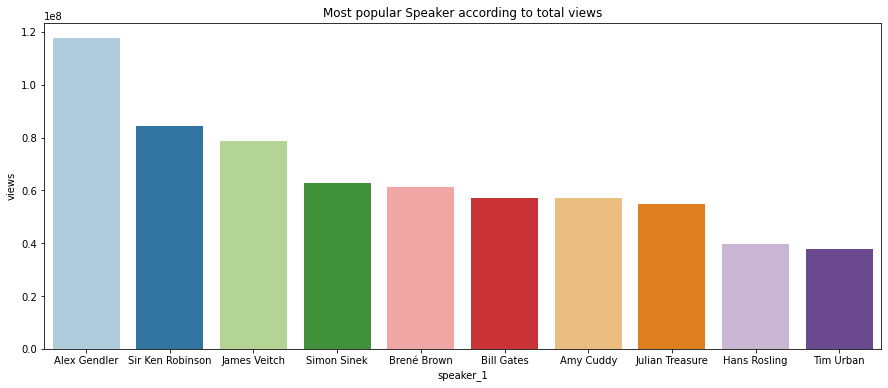

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,6))
plt.title('Most popular Speaker according to total views')
sns.barplot(x='speaker_1', y='views', data=popular_speaker_df,palette='Paired')

##### 1. Why did you pick the specific chart?

Because i wanted to check who is the most popular speaker.

##### 2. What is/are the insight(s) found from the chart?

Alex Gendler is the most popular speaker followed by Sir Ken Robinson and James veitch.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 3

which is the most frequent and most popular event in TED?

In [ ]:
#most_frequent_event
popular_event_df = df.groupby('event').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_event_df

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


In [ ]:
#find most popular event
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views']).reset_index()
pop_event_df

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


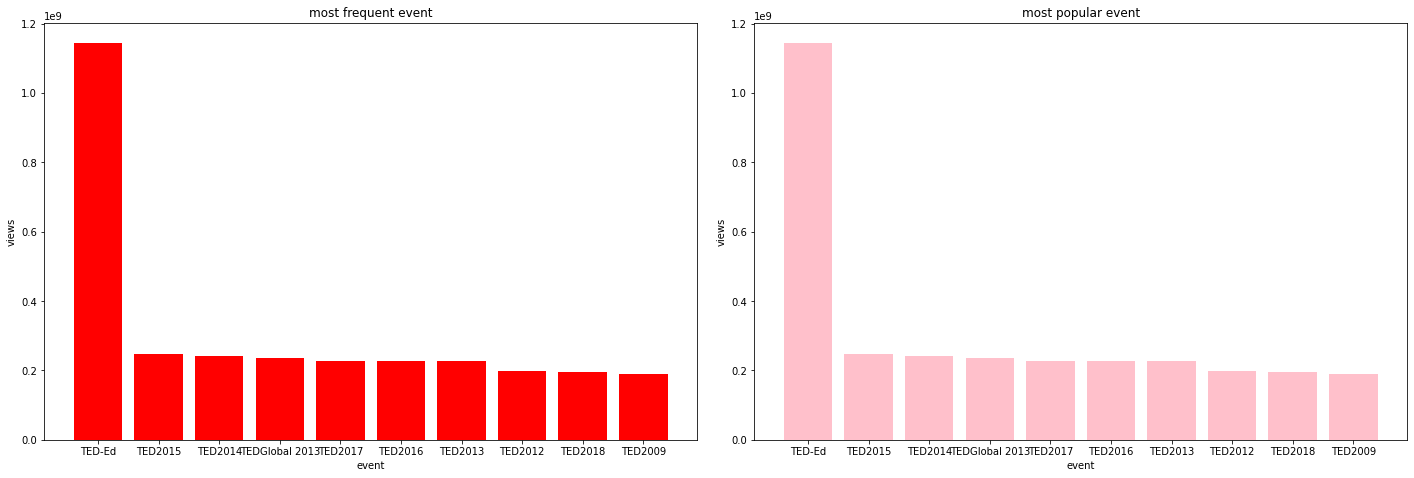

In [ ]:
# Chart - 3 visualization code
# Plotting both graphs
#setting x and y values in the plot
x = popular_event_df['event']
y = popular_event_df['views']
x1 = pop_event_df['event']
y1 = pop_event_df['views']

plt.subplots(figsize=(20, 7))

# using subplot function and creating plot one
plt.subplot(1, 2, 1)
plt.bar(x, y, color='red')
plt.title('most frequent event')
plt.xlabel('event')
plt.ylabel('views')

# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt.bar(x1, y1,color='pink')
plt.title('most popular event')
plt.xlabel('event')
plt.ylabel('views')
# space between the plots
plt.tight_layout(2)

# show plot
plt.show()

##### 1. Why did you pick the specific chart?

Because i wanted to check most frequent and popular shows on TED.

##### 2. What is/are the insight(s) found from the chart?

TED-Ed is the most popular and frequent event

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 4

Which is most common native language show?

In [ ]:
df.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

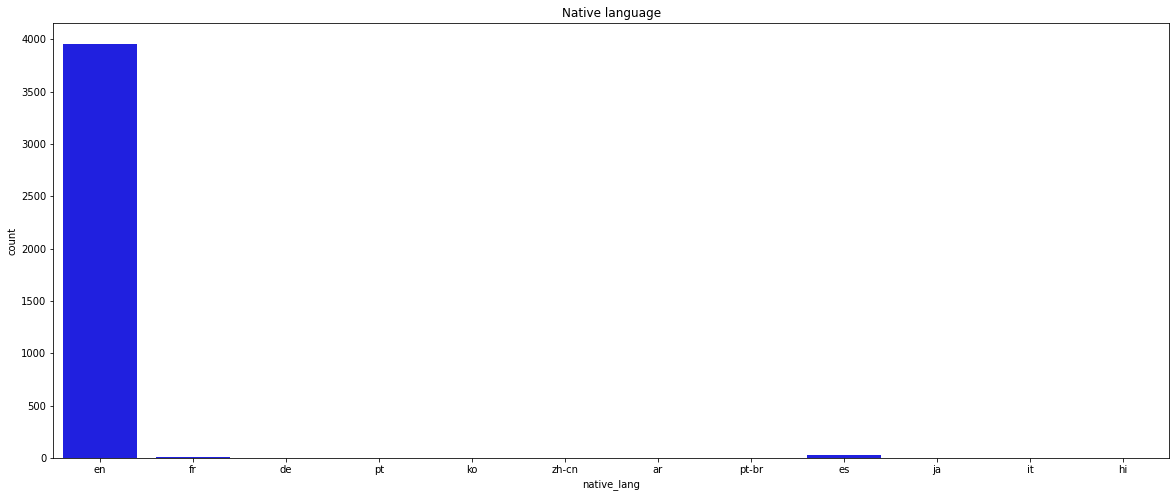

In [ ]:
# Chart - 4 visualization code
plt.title('Native language')
sns.countplot(df['native_lang'],color='blue')

##### 1. Why did you pick the specific chart?



To check which is the common language on TED shows.

##### 2. What is/are the insight(s) found from the chart?

Here, approx 99% values in native_lang column is english.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 5

Which is  the most frequent words in the title?

In [ ]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


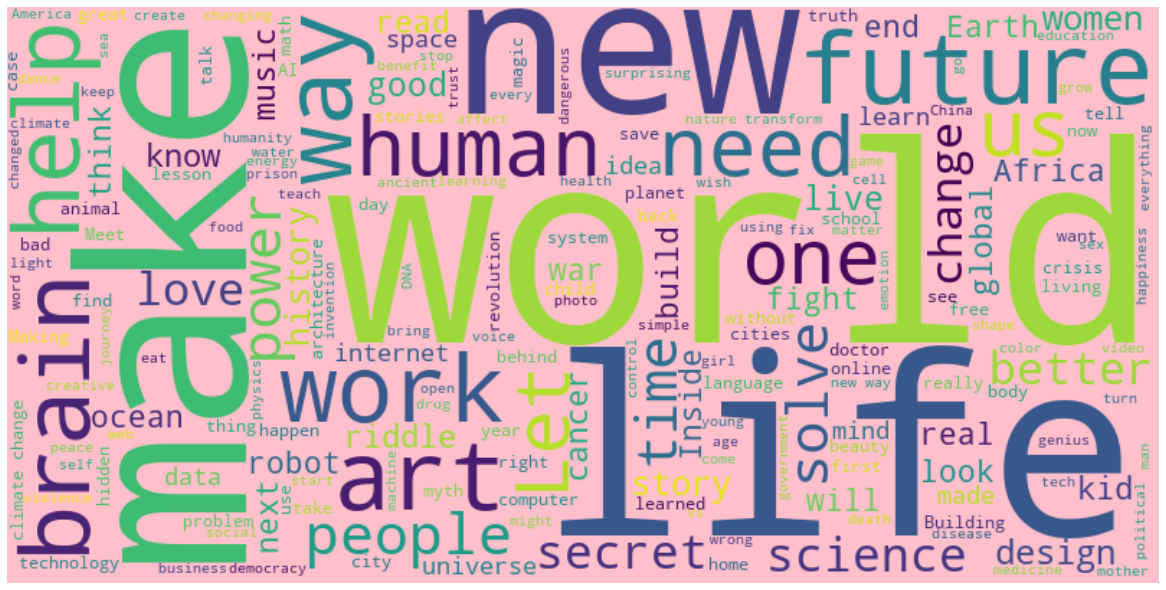

In [ ]:
# Chart - 5 visualization code
#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="pink", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

To check which words are most used in the title.

##### 2. What is/are the insight(s) found from the chart?

Majority of Titles contains words like life, world, make, new, future, art.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 6

Which is the most popular title with respect to views?

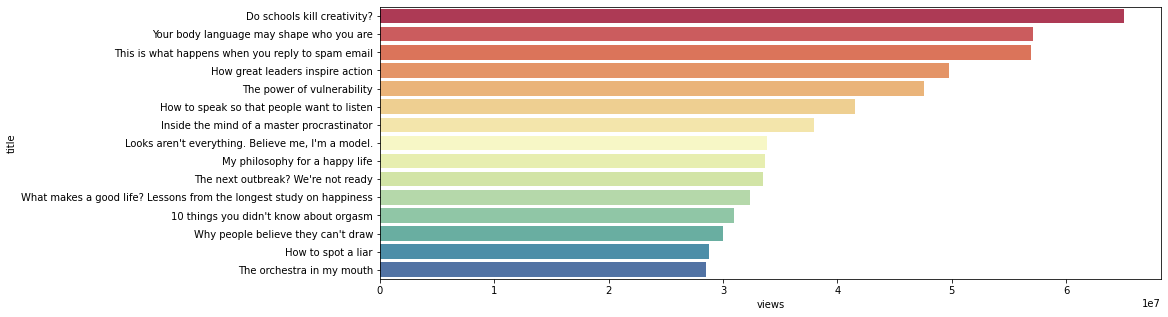

In [ ]:
# Chart - 6 visualization code
popular_title = df[['title','views']].groupby('title').agg({'views' : 'mean'}).reset_index().sort_values(by=['views'],ascending=False).head(15)
plt.rcParams["figure.figsize"] = (14,5)
sns.barplot(x='views',y='title',data=popular_title,palette='Spectral')

##### 1. Why did you pick the specific chart?

To find the most popular title with respect to views.

##### 2. What is/are the insight(s) found from the chart?

Most popular title is "Do schools kill creativity?" with 60+ million views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 7

Extracting day,month and year from published_date column



In [ ]:
#applying strptime on published_date column
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

#extracting release day, month and year from the published date column
df['published_date_day'] = df['published_date'].apply(lambda x: x.weekday())
df['published_date_month']=df['published_date'].apply(lambda x: x.month)
df['published_date_year'] = df['published_date'].apply(lambda x: x.year)

In [ ]:
#encoding of published_date_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['published_date_day']=df['published_date_day'].map(week_day)

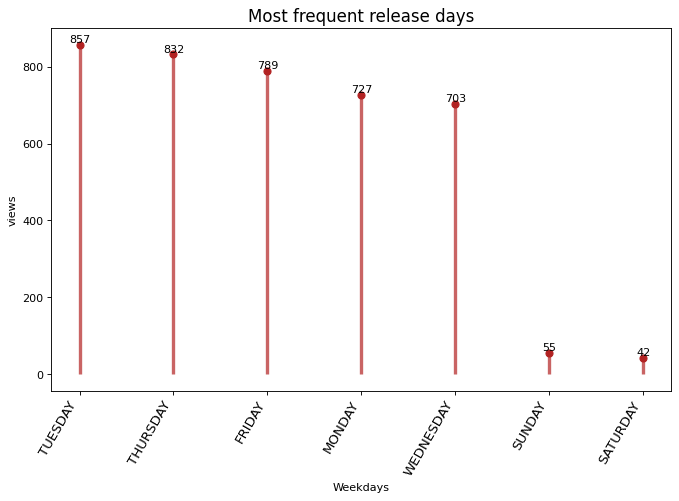

In [ ]:
# Chart - 7 visualization code
#checking the day of the month having maximum release date
freq_rel_day=df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=freq_rel_day.index, ymin=0, ymax=freq_rel_day.views, color='firebrick', alpha=0.7, linewidth=3)
ax.scatter(x=freq_rel_day.index, y=freq_rel_day.views, s=40, color='firebrick', alpha=1)
ax.set_xticks(freq_rel_day.index)
ax.set_xticklabels(freq_rel_day.published_date_day.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
plt.title("Most frequent release days",fontsize=15)
# Printing the count in graph
for row in freq_rel_day.itertuples():
    ax.text(row.Index, row.views+.5, s=round(row.views, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)
# Show the object
plt.xlabel('Weekdays')
plt.ylabel('views')
plt.show()

##### 1. Why did you pick the specific chart?


To find the most frequent release date.

##### 2. What is/are the insight(s) found from the chart?


Most frequent releases are on Tuesday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 8

Which is the best release day of the week with respect to average views?

Text(0, 0.5, 'views')

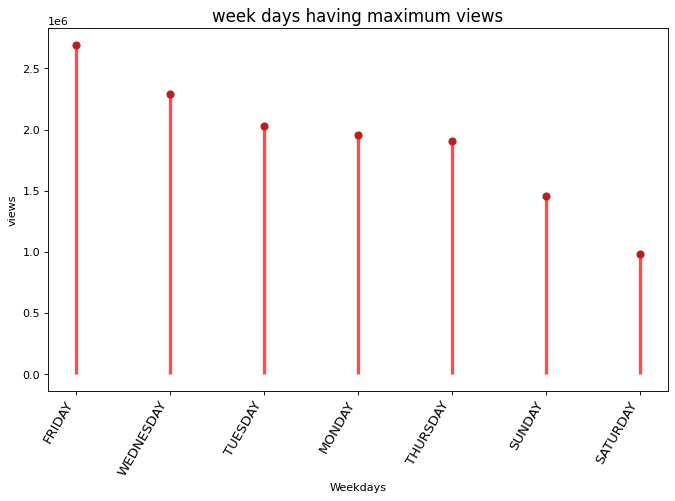

In [ ]:
# Chart - 8 visualization code

#checking popular release day wrt views
pop_rel_day=df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=pop_rel_day.index, ymin=0, ymax=pop_rel_day.views, color='red', alpha=0.7, linewidth=3)
ax.scatter(x=pop_rel_day.index, y=pop_rel_day.views, s=40, color='firebrick', alpha=1)
ax.set_xticks(pop_rel_day.index)
ax.set_xticklabels(pop_rel_day.published_date_day.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
plt.title("week days having maximum views",fontsize=15)
plt.xlabel('Weekdays')
plt.ylabel('views')

##### 1. Why did you pick the specific chart?

To find the best release day of the week with respect to average views.

##### 2. What is/are the insight(s) found from the chart?

1--Most videos are published on Tuesday followed by Thursday.

2--But the videos published on Friday are more popular (i.e. have more average views) followed by wednesday.

3--Friday release is impacting the views of the video

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 9

Which month has max releases?

In [ ]:
#checking months having maximum release
freq_rel_month=df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
freq_rel_month

,published_date_month,views
0,4,423
1,3,419
2,2,412
3,10,350
4,1,348
5,9,347
6,5,312
7,6,310
8,11,305
9,7,278


In [ ]:
#Printing the most popular release month according to average Views
pop_rel_month=df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)
pop_rel_month

,published_date_month,views
0,3,2.644200e+06
1,5,2.449977e+06
2,9,2.224862e+06
3,4,2.180815e+06
4,2,2.135949e+06
5,7,2.127899e+06
6,6,2.125505e+06
7,12,2.109443e+06
8,1,2.014319e+06
9,10,1.909282e+06


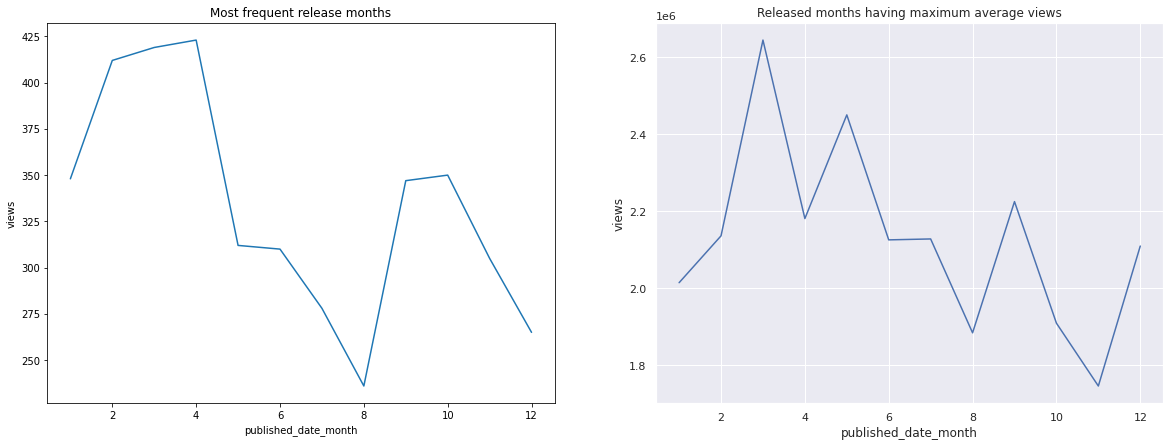

In [ ]:
# Chart - 9 visualization code
# plotting the months having maximum release
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.lineplot(x='published_date_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

#plotting most popular release month according to average Views
plt.subplot(1,2,2)
plt.title('Released months having maximum average views')
sns.lineplot(x='published_date_month',y='views',data=pop_rel_month)
plt.show()


##### 1. Why did you pick the specific chart?

To find which month has maximum releases and which month has maximum average views.

##### 2. What is/are the insight(s) found from the chart?

April have maximum released videos, But the videos released in March are more popular

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 10

Which years have maximum releases?

In [ ]:
df['release_year'] = df['published_date'].apply(lambda x: x.year)

In [ ]:
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent release years')

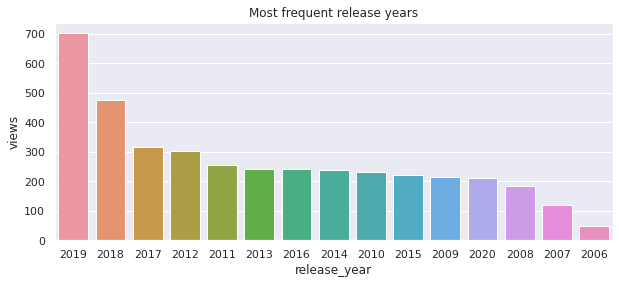

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year, order=freq_rel_year.sort_values('views',ascending = False).release_year)
plt.title('Most frequent release years')

##### 1. Why did you pick the specific chart?

To check which is the most frequent release year.

##### 2. What is/are the insight(s) found from the chart?

Most videos are published in 2019 followed by 2018 and 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 11

Which is the most popular release years according to average views?

In [ ]:
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)


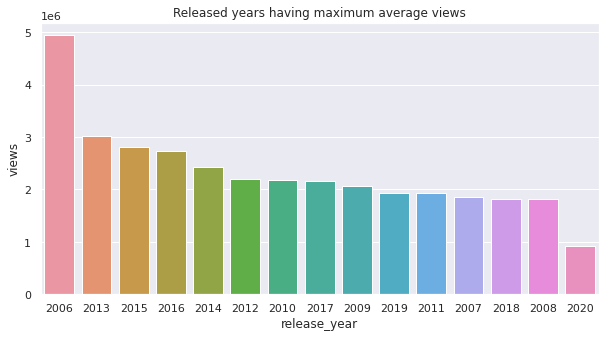

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views', data=pop_rel_year, order=pop_rel_year.sort_values('views',ascending =False).release_year)

##### 1. Why did you pick the specific chart?

To find the most popular release years according to average views.

##### 2. What is/are the insight(s) found from the chart?

The videos published in 2006 are most viewed followed by 2013 and 2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 12 - Correlation Heatmap

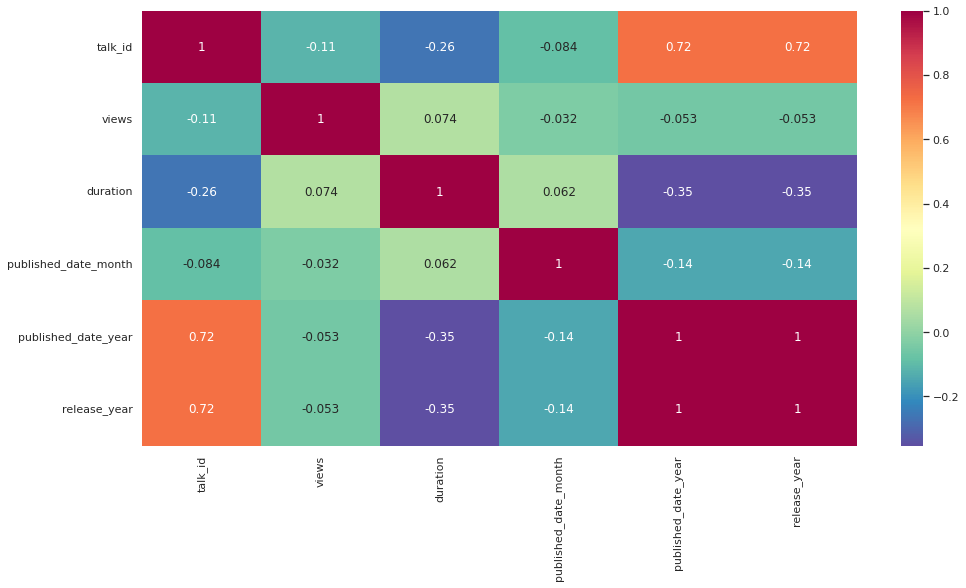

In [ ]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True, cmap='Spectral_r')

##### 1. Why did you pick the specific chart?

Heat map gives us better understanding of correaltion.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

talk_id                 0
title                   0
speaker_1               0
all_speakers            0
occupations             0
about_speakers          0
views                   0
recorded_date           0
published_date          0
event                   0
native_lang             0
available_lang          0
comments                0
duration                0
topics                  0
related_talks           0
description             0
transcript              0
published_date_day      0
published_date_month    0
published_date_year     0
release_year            0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have alreday dealt with null values and replaced them with values.

### 2. Handling Outliers

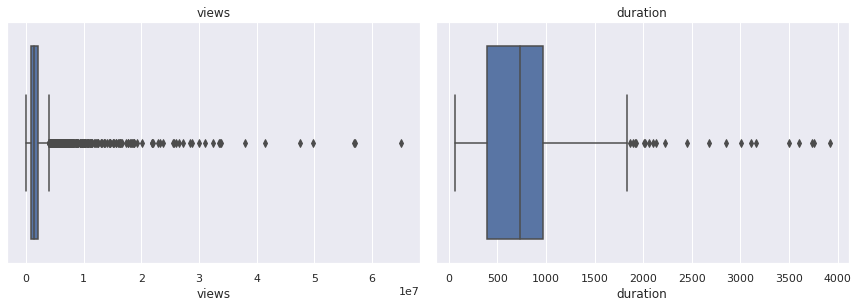

In [ ]:
# Handling Outliers & Outlier treatments
# checking Outliers using boxplot
columns = ['views', 'duration',]
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()


In [ ]:
#Treatment of outliers by mean
for i in columns:
  iqr =  df[i].quantile(0.75)-df[i].quantile(0.25)
  df[i]= df[i].mask(df[i]>(df[i].quantile(0.75)+1.5*iqr), df[i].mean())


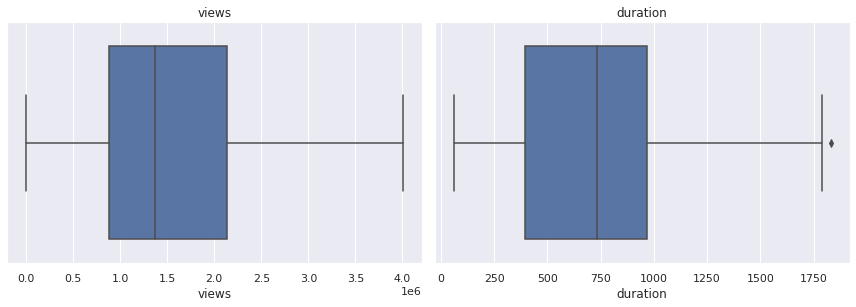

In [ ]:
#Numerical column again after treating outliers
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We observe that Outliers are present in views,comments and duration which needs to be treated. We are replacing the outliers with the mean values and talk_id is id of speakers so we can't have its's data as outliers.

### 3. Categorical Encoding

In [ ]:
#target encoding on speaker_1 column
pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

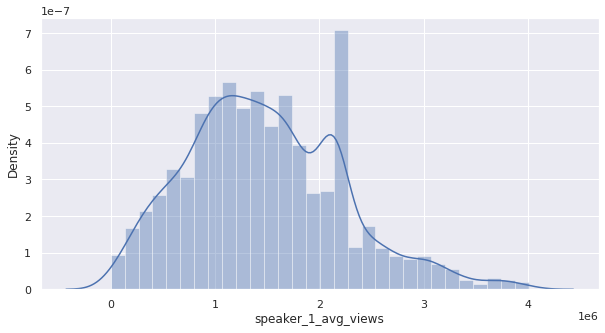

In [ ]:

#plotting the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])


In [ ]:
#applying target encoding on event column
pop_event=df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
df['event_wise_avg_views']=df['event'].map(pop_event)

Now, we have done target encoding on categorical values in the event column.

We can further use this feature directly while modelling.

We can drop the event column now.

In [ ]:
#dropping event column
df=df.drop(columns='event')

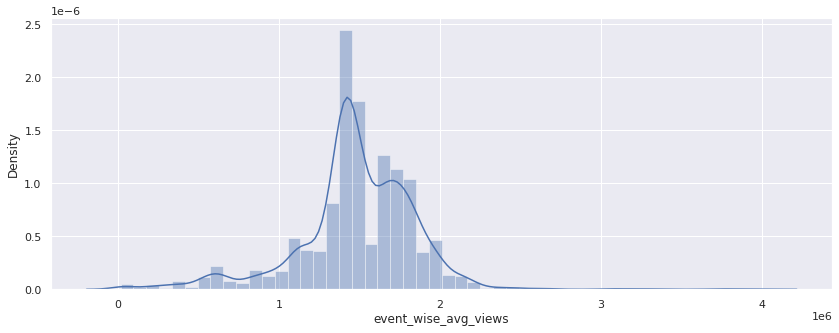

In [ ]:
#Plotting the distplot of event_wise_avg_views
sns.distplot(df['event_wise_avg_views'])

In [ ]:

#applying eval function on available_lang column
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

len(df['available_lang'][10])

26

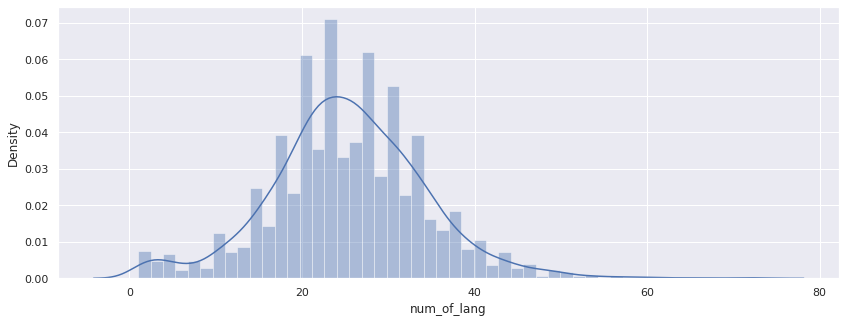

In [ ]:
df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

#dropping the available_lang column
df.drop(columns='available_lang',inplace=True)

sns.distplot(df['num_of_lang'])

In [ ]:
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

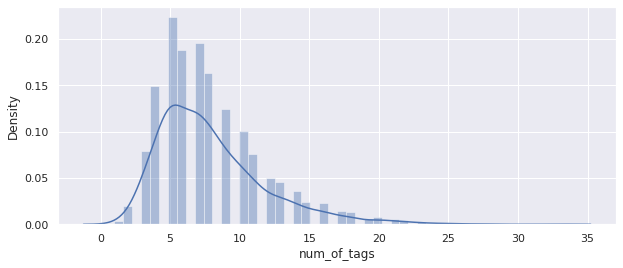

In [ ]:
#Adding a new feature which contains the count of total no of topics for a particular video.
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)
plt.figure(figsize=(10,4))
sns.distplot(df['num_of_tags'])

In [ ]:
#extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)

len(unique_topics)

457

In [ ]:
#fetching the avg views with respect to each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#storing the avg views with respect to the topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]

  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

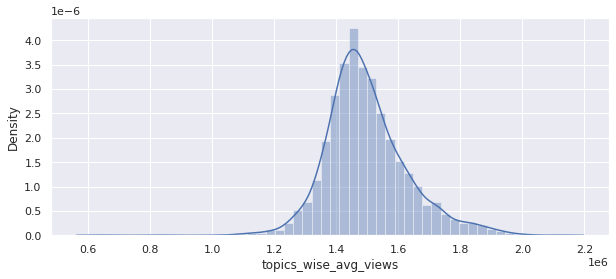

In [ ]:
#plotting topics_wise_avg_views
plt.figure(figsize=(10,4))
sns.distplot(df['topics_wise_avg_views'])

We can add a new column called video_age which is the difference of current year and published year.

In [ ]:
df['video_age']=2022-df['release_year']

In [ ]:
#dropping published_date column
df=df.drop(columns='published_date')

In [ ]:

#applying eval function on available_lang column
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

df['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 54715: 'How we can turn the tide on climate',
 29968: 'The most important thing you can do to fight climate change: talk about it',
 2339: "Climate change is happening. Here's how we adapt"}

1--Related_talks column contains a dictionary containing information about six related videos with talk_id as key and video title as it's value.

2--We can take mean of the views of those six related talks for each video and can add as a new feature called related_views.

In [ ]:
#defining a new feature called related_views
df['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6


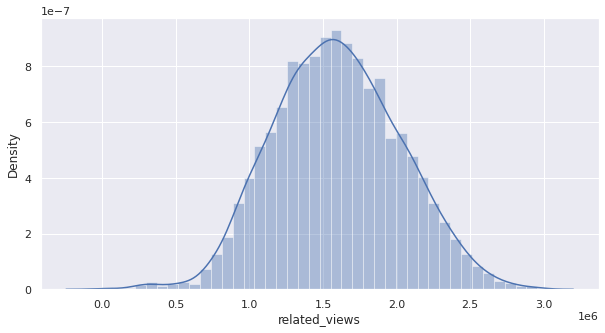

In [ ]:
#Let's plot the related_views column
plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

In [ ]:
#creating a copy of the dataframe
gf=df.copy()
df=gf.copy()

In [ ]:
#dropping unimportant columns from the dataframe.
df.drop(columns=['talk_id','title','speaker_1', 'all_speakers',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','occupations','release_year'],inplace=True)


In [ ]:
#separating the dependent and independent variables
y=df['views']
X=df.drop(columns='views')

In [ ]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 631)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have done one hot encoding using get_dummies function


One-hot encoding turns categorical data into a binary vector representation.


This means that for each unique value in a column, a new column is created. The values in this column are represented as 1s and 0s, depending on whether the value matches the column header.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#already done

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#printing the shape of features
X.shape

(4005, 631)

**Feature selection for numerical features using f_regression.**

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
#finding the f scores of each features
f_scores = f_regression(X, y)
f_scores

(array([3.43871548e+01, 1.32684749e+00, 1.86532977e+00, 2.13709617e+04,
        1.03667764e+03, 6.54377624e+02, 1.41938176e+01, 9.02786377e+02,
        1.86532977e+00, 6.08557637e+02, 1.02251163e-03, 5.30827825e-01,
        3.23997631e+01, 2.56213324e+01, 7.58425018e+00, 2.45059738e+00,
        5.95423880e+00, 2.88208410e+00, 5.04761765e-01, 1.92699288e+00,
        1.45399041e-01, 1.82739374e-02, 4.96833731e+00, 4.62740039e+00,
        2.86720505e+00, 1.80700921e+01, 1.03889199e+01, 1.25465637e+01,
        7.01849293e+00, 5.50289967e+00, 3.45354663e+00, 1.20015181e+01,
        1.33229712e+01, 4.29293149e+00, 9.75078804e+00, 3.84033828e+00,
        4.09796943e+00, 4.68588171e+00, 1.01379208e+00, 1.00950084e-01,
        1.03762708e+00, 9.18127281e-01, 5.12493605e-01, 2.79193016e+00,
        3.62692621e-01, 3.15455716e-01, 8.97444923e-01, 3.40268215e-01,
        1.72570397e+00, 4.13593102e-01, 5.40060358e-01, 4.76774044e-02,
        1.60887218e-01, 4.00555471e-01, 2.87025707e-02, 3.921774

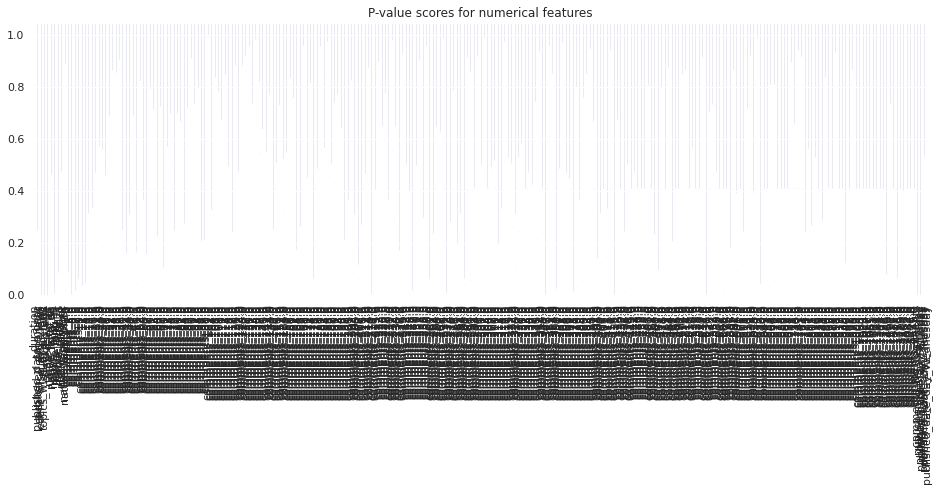

In [ ]:
#The second array consists of p-values that we need. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

From here using p value analysis we can drop those features having high p values.

In [ ]:
X.columns

Index(['duration', 'published_date_month', 'published_date_year',
       'speaker_1_avg_views', 'event_wise_avg_views', 'num_of_lang',
       'num_of_tags', 'topics_wise_avg_views', 'video_age', 'related_views',
       ...
       'comments_4931.0', 'comments_6449.0', 'comments_No Comments',
       'published_date_day_Friday', 'published_date_day_Monday',
       'published_date_day_Saturday', 'published_date_day_Sunday',
       'published_date_day_Thursday', 'published_date_day_Tuesday',
       'published_date_day_Wednesday'],
      dtype='object', length=631)

In [ ]:
#Let's take all the important features in a list.
ll=['comments', 'duration', 'num_of_lang', 'num_of_tags','event_wise_avg_views',
       'related_views', 'release_day_Friday','speaker_1_avg_views','topics_wise_avg_views']
len(ll)


9

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wise
#Applying train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### What data splitting ratio have you used and why?

---



training set - 80%
test set - 20%
because we want to go by the standard norms.

## ***6. ML Model Implementation***

### ML Model - 1

 **Let's apply linear regression model.**

In [ ]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)

y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))


MSE on test is 127376680657.90692
RMSE on test is 356898.6980333592
Training MAE: 151660.28
Test MAE: 199794.54


Despite of the fact that our features are not following linear assumption which we have checked earlier, this model is giving a satisfactory score.

### ML Model - 2

**Random Forest Regressor**

In [ ]:
#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 59372.93
Test MAE: 169269.48
Target mean: 1478673.79
Target std: 815054.90


It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [ ]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_

In [ ]:
rf_optimal_model

RandomForestRegressor(criterion='mae', max_depth=12, min_samples_leaf=10,
                      min_samples_split=50, n_estimators=120)

In [ ]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 132591.19
Test MAE: 146415.19


In [ ]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8561704306614537
For test set the R_Squared for RFforest is 0.8213952530550651 and adjusted R_Squared is 0.7879829805017731


In [ ]:
#Defining the model
model =[
        ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)]
      ]
#Let's run the the model and store the results in a dataframe
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_rf = pd.DataFrame(model_data)

#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,136962.506022,146806.646689,0.849322,0.822358,314081.297882,349072.13335


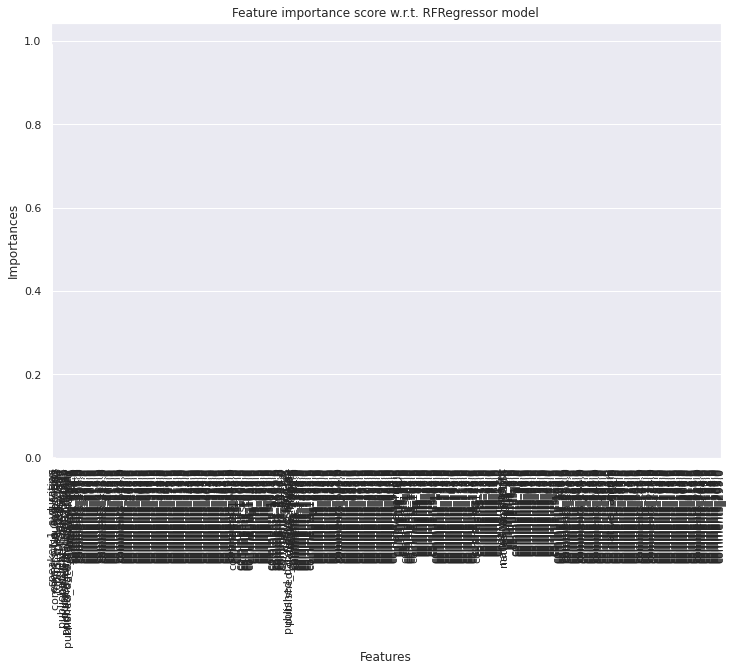

In [ ]:
importances = pd.DataFrame({'Features': X.columns,
                                'Importances': rf_optimal_model.feature_importances_})

importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(12, 8))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show()

**speaker_avg_views is the most important feature in Random Forest regressor**

### ML Model - 3

**Applying XGboost regressor model**

In [ ]:
#XGBoost Regressor
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[14:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.1s
[14:04:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.0s
[14:04:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.0s
[14:04:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.0s
[14:04:08] WARNING: /worksp

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
#finding xgb_optimal_model
xgb_optimal_model = xgb_random.best_estimator_

xgb_optimal_model

XGBRegressor(max_depth=6, min_samples_leaf=50, min_samples_split=50,
             n_estimators=80)

In [ ]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.9447475680156907
For test set the R_Squared for XGBoost is 0.8194124837707029 and adjusted R_Squared is 0.7856292869901851


In [ ]:
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))


Training MAE: 101107.26
Test MAE: 170852.24


In [ ]:
#Defining the model
model = [
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_xgb = pd.DataFrame(model_data)
#printing the results_df_xgb
results_df_xgb

[14:07:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,XGBRegressor:,128550.389104,169116.365352,0.908523,0.822761,244722.863246,348675.760125


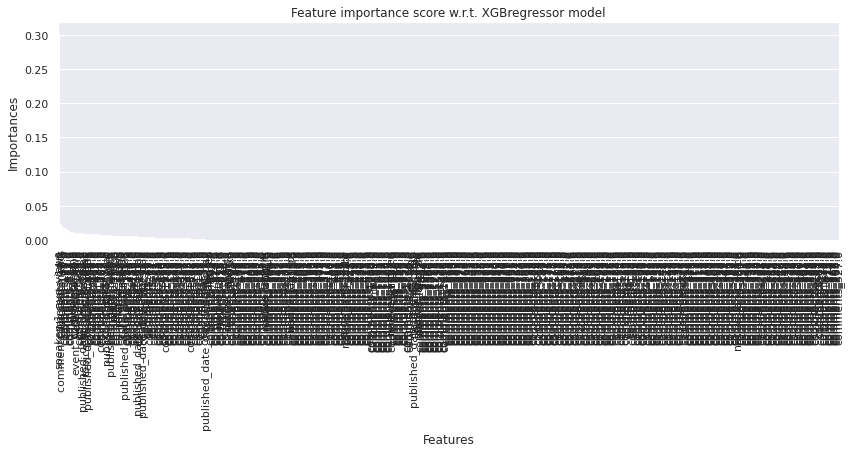

In [ ]:
#Plotting the feature importance score w.r.t. XGBregressor model
importances = pd.DataFrame({'Features': X.columns,
                                'Importances': xgb_optimal_model.feature_importances_})

importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

**speaker1_avg_views is the most important feature in XGBregressor model followed by event_wise_avg_views.**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose MAE and not RMSE as the deciding factor of our model selection because of the following reasons:

1--RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.
Thus MAE doesn’t increase with outliers. MAE is linear and RMSE is quadratically increasing.

2--The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE.

In [ ]:
#printing the scores of Random Forest Regressor model
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,136962.506022,146806.646689,0.849322,0.822358,314081.297882,349072.13335


In [ ]:
print(f'Mean value of our target variable is {y.mean()}')

Mean value of our target variable is 1478673.7926333656
Mean value of our target variable is 1478673.7926333656


# **Conclusion**

Performed Exploratory data analysis on various features, then carried out feature engineering and encoding of categorical columns, handled missing values in the dataset, dealt with outliers present in the dataset , performed transformations like log, sqrt and boxcox on numerical features to convert them to gaussian distribution, then carried out feature selection and build various models.

**Following models have been used:**

1--Linear Regressor

2--Random Forest Regressor

3--XGB Regressor

Evaluated these models on various metrics like MSE, RMSE, MAE ,R2 score and Adjusted R2 score. Finally selected the best model out of these.

In all these models our errors have been in the range of 2,00,000 which is around 10% of the average views. The model has been able to correctly predict views 90% of the time. After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing and reducing learning rate. Given that only have 10% errors, our models have performed very well on unseen data due to various factors like feature selection, correct model selection.

After evaluating the performance of all the models, the best model is Random Forest Regressor based on MAE because MAE is linear and robust to outliers.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***